In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
supply['Year'] = pd.to_datetime(supply['Year'], format="%Y")
supply.head()

,Country,Year,Value
0,Algeria,2004-01-01,2987
1,Algeria,2005-01-01,2958
2,Algeria,2006-01-01,3047
3,Algeria,2007-01-01,3041
4,Algeria,2008-01-01,3048


In [3]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  450 non-null    object        
 1   Year     450 non-null    datetime64[ns]
 2   Value    450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.7+ KB


In [4]:
[supply["Value"]==0]
#or
#[supply]==0

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 445    False
 446    False
 447    False
 448    False
 449    False
 Name: Value, Length: 450, dtype: bool]

Data labes on hover using the Supply df

In [39]:
data1 = supply
fig = go.Figure(data=go.Scatter(x=supply["Year"],
                               y=supply["Value"],
                               mode ='markers',
                               marker_color=supply["Value"],
                               text=supply["Country"]))
fig.update_layout(title="Food Supply in Africa from 2004 - 2013")
fig.show()                

In [40]:
ran_50 = supply.sample(n=50, random_state=10)
ran_50 = ran_50.sort_values(by="Value", ascending=False)
ran_50["Value"]
X=range(50)
X

range(0, 50)

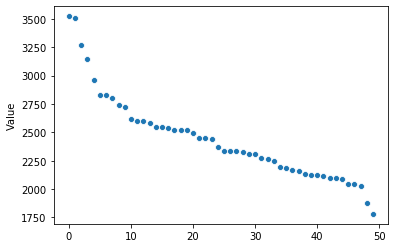

In [41]:
import seaborn as sns
sns.scatterplot(data=ran_50, x=X, y=ran_50["Value"])

Recreating the above sns plot using plotly for an interactive plot

In [42]:
data2 = ran_50
fig = go.Figure(data=go.Scatter(y=ran_50["Value"],
                               mode="markers",
                               marker_color=ran_50["Value"],
                               text=ran_50["Country"]))
fig.update_layout(title="Hover Plot of random 50 samples ")
fig.show()

In [43]:
data3=ran_50
df = px.data.tips()
fig = px.box(df, y=ran_50["Value"])
fig.show()

In [44]:
data4=supply
df = px.data.tips()
fig=px.box(df, x=data.Year, y=data['Value'])
fig.update_traces(quartilemethod="linear",notched=True , boxmean=True)
fig.update_layout(title="Food Consumption in 45 countries btwn 2004-2013")
fig.show()

TO GET THE DATA FOR THE YEAR 2012

In [52]:
supply_2012 = supply[supply.Year == "2012-01-01"]
supply_2012

,Country,Year,Value
8,Algeria,2012-01-01,3272
18,Angola,2012-01-01,2384
28,Benin,2012-01-01,2610
38,Botswana,2012-01-01,2342
48,Burkina Faso,2012-01-01,2707
58,Cabo Verde,2012-01-01,2590
68,Cameroon,2012-01-01,2622
78,Central African Republic,2012-01-01,2116
88,Chad,2012-01-01,2124
98,Congo,2012-01-01,2158


IQR = Q3 - Q1
lower fence = Q1 - 1.5(IQR)
upper fence = Q3 + 1.5(IQR)
an OUTLIER is a value that falls above the upper fence or below the lower fence

In [46]:
# IQR for 2012 is
Q1 = 2199.25
Q3 = 2725.25
IQR = Q3 - Q1
print("The IQR is: ",IQR)

lower_fence = Q1 - (1.5*IQR)
print("The lower fence is :", lower_fence)
upper_fence = Q3 + (1.5*IQR)
print("The upper fence is :", upper_fence)

The IQR is:  526.0
The lower fence is : 1410.25
The upper fence is : 3514.25


In [47]:
upper_outlier = target[target.Value>upper_fence]
lower_outlier = target[target.Value<lower_fence]

outlier = pd.concat([upper_outlier, lower_outlier])
#list(outlier.itertuples(name=None))
outlier

,,,Value
Year,Country,Value,
2012-01-01,Egypt,3561,3561


In [64]:
data5 = supply_2012
fig = go.Figure(data=go.Scatter(y=data5["Value"],x=data5["Country"],
                               mode="markers",
                               marker_color=data["Value"],
                               text=data["Country"]))
fig.update_layout(title="Hover Plot of outliers within the dataset  ")
fig.show()

In [61]:
data6 = supply_2012
fig = px.scatter(data6, x="Country", y="Value", text="Country")
#to add two horizontal lines
fig.update_layout(width=1000,
                 height = 900,
                 autosize = False,
                 shapes=[
                     dict(type="line", xref="paper",x0=0,x1=1, yref="y",y0=1923, y1=1923, line=dict(
                          color="Red", width=1,)),
                     
                     #to add lines for mean, median, upper and lower fences respectively:
                     dict(type="line", xref="paper",x0=0,x1=1, yref="y",y0=2407, y1=2407, line=dict(
                          color="Red", width=1,)),
                     dict(type="line", xref="paper",x0=0,x1=1, yref="y",y0=2567.644444, y1=2567.644444, line=dict(
                          color="Red", width=1,)),
                     dict(type="line", xref="paper",x0=0,x1=1, yref="y",y0=3390,y1=3390, line=dict(
                          color="Red", width=1,)),
                 ], showlegend=False)

fig.update_traces(textposition="top center")
fig.update_xaxes(showticklabels=True)
fig.show()

In [50]:
data7 = target
fig = px.scatter(data, x="Country", y="Value", text="Country")
fig.show()

## Try to find the outlier for another year

In [15]:
pd.DataFrame(supply.Year == '2012-01-01')

,Year
0,False
1,False
2,False
3,False
4,False
...,...
445,False
446,False
447,False
448,True


In [16]:
px.scatter(supply, x="Country", y="Value", title="2012 FOOD SUPPLY BY COUNTRY", text="Country")


In [17]:
target=supply[supply["Year"]==2012]
target

,Country,Year,Value


In [18]:
prod=pd.read_csv('Africa Food Production (2004 - 2013).csv')
prod["Year"]=pd.to_datetime(prod["Year"], format='%Y')

In [19]:
pd.set_option('display.max_rows',500)
rice_df=prod[prod.Item == "Rice (Milled Equivalent)"]
rice_df.groupby('Country')["Value"].mean()

Country
Algeria                           0.0
Angola                           10.3
Benin                            85.0
Burkina Faso                    126.5
Cameroon                         76.7
Central African Republic         26.1
Chad                            116.7
Congo                             1.0
Cote d'Ivoire                   643.9
Egypt                          4037.0
Ethiopia                         46.9
Gabon                             1.0
Gambia                           32.5
Ghana                           244.3
Guinea                         1040.0
Guinea-Bissau                   103.0
Kenya                            50.4
Liberia                         160.2
Madagascar                     2611.8
Malawi                           67.4
Mali                           1037.1
Mauritania                       75.1
Mauritius                         0.1
Morocco                          27.4
Mozambique                      111.0
Niger                            26.7
Nige

In [20]:
rice_df.shape

(380, 4)